**Feature Creation Techniques :**

1)Mathematical Transformations :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Load tips datasets
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
#Create a new feature: log of total bill
tips['log_total_bill'] = np.log(tips['total_bill'])

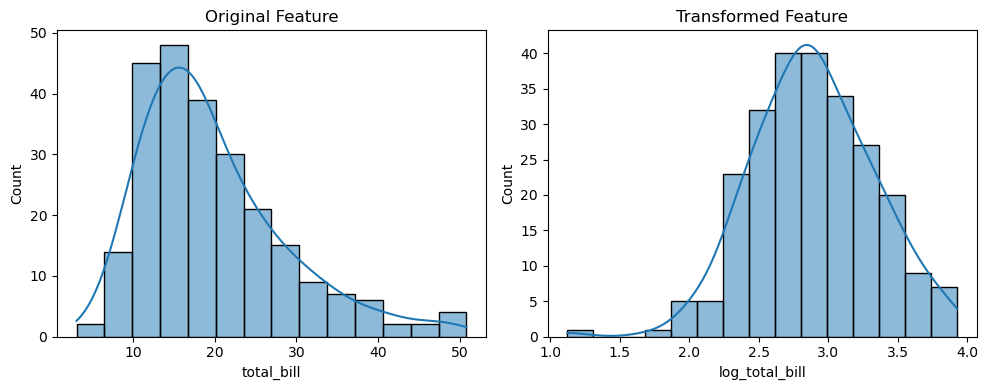

In [5]:
#Visualize the orginal and transformed features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(tips['total_bill'], ax=ax1, kde=True)
ax1.set_title('Original Feature')
sns.histplot(tips['log_total_bill'], ax=ax2, kde=True)
ax2.set_title('Transformed Feature')
plt.tight_layout()
plt.show()

2)Interaction Features :

In [8]:
#Load the mpg dataset
mpg = sns.load_dataset('mpg')
mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


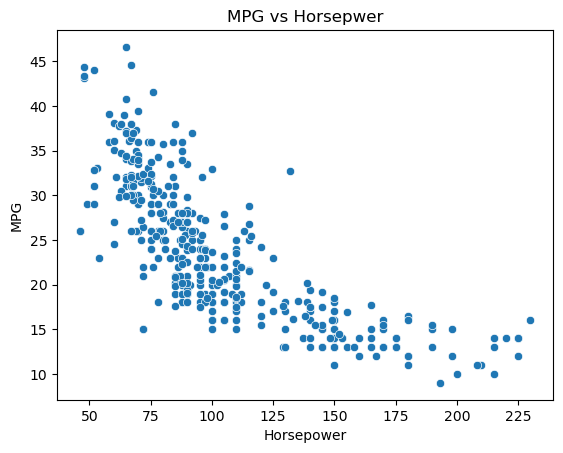

In [7]:
#Visualize the relationship
sns.scatterplot(x='horsepower', y='mpg', data=mpg)
plt.title('MPG vs Horsepwer')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

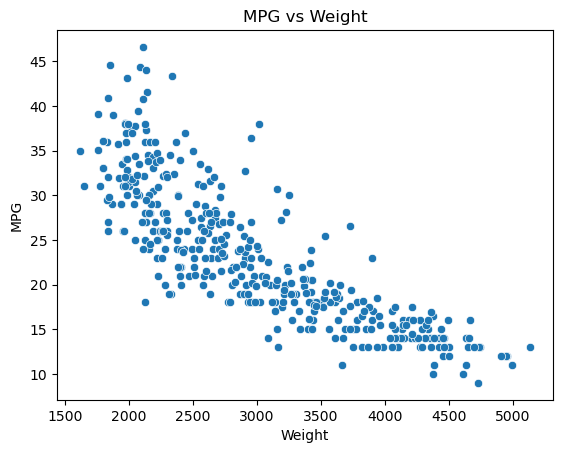

In [9]:
#Visualize the relationship
sns.scatterplot(x='weight', y='mpg', data=mpg)
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

In [10]:
#Create an interaction feature: horsepower * weight
mpg['hp_Weight_interaction'] = mpg['horsepower'] * mpg['weight']

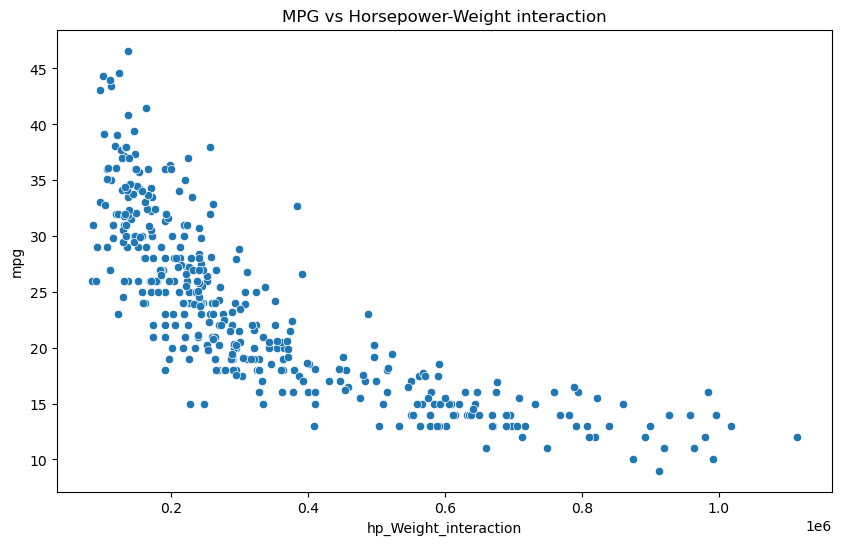

In [15]:
#visualiza the relatonship
plt.figure(figsize=(10,6))
sns.scatterplot(x='hp_Weight_interaction',y='mpg',data=mpg)
plt.title('MPG vs Horsepower-Weight interaction')
plt.show()

3)Polynomial Features :

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


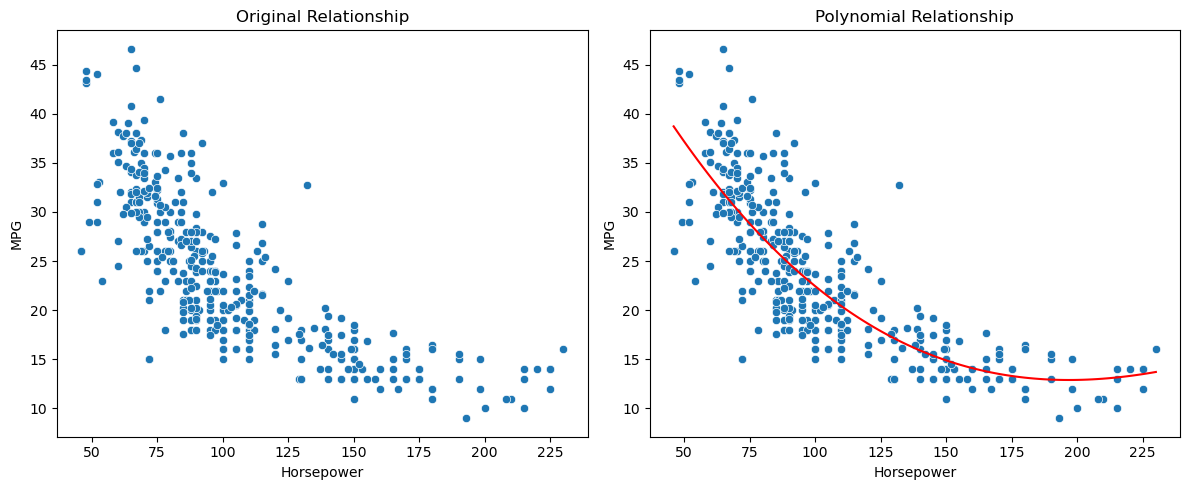

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Load the mpg dataset
mpg = sns.load_dataset('mpg')

#Remove rows with missing values
mpg = mpg.dropna()

#Extract horsepower and mpg
X = mpg[['horsepower']]
y = mpg['mpg']

#plot the orginal relationship
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.scatterplot(x='horsepower', y='mpg', data=mpg)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Original Relationship')

#Create polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

#Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

#Generate points for the polynomial curve
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

#Plot the polynomial curve
plt.subplot(122)
sns.scatterplot(x='horsepower', y='mpg', data=mpg)
plt.plot(X_curve, y_curve, color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Relationship')
plt.tight_layout()
plt.show()


In [18]:
#Show the relationship between the 3rd degree
data = pd.DataFrame(X_poly, columns=['horsepower', 'horsepower^2', 'horsepower^3'])
data['mpg'] = y
data

,horsepower,horsepower^2,horsepower^3,mpg
0,130.0,16900.0,2197000.0,18.0
1,165.0,27225.0,4492125.0,15.0
2,150.0,22500.0,3375000.0,18.0
3,150.0,22500.0,3375000.0,16.0
4,140.0,19600.0,2744000.0,17.0
...,...,...,...,...
387,86.0,7396.0,636056.0,38.0
388,52.0,2704.0,140608.0,26.0
389,84.0,7056.0,592704.0,22.0
390,79.0,6241.0,493039.0,32.0


**Feature Transformation Methods :**

1)Aggregation methods :


In [19]:
#Load the flights datasets
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [26]:
#Aggregate passengers by year
yearly_passengers = flights.groupby('year')['passengers'].sum().reset_index()


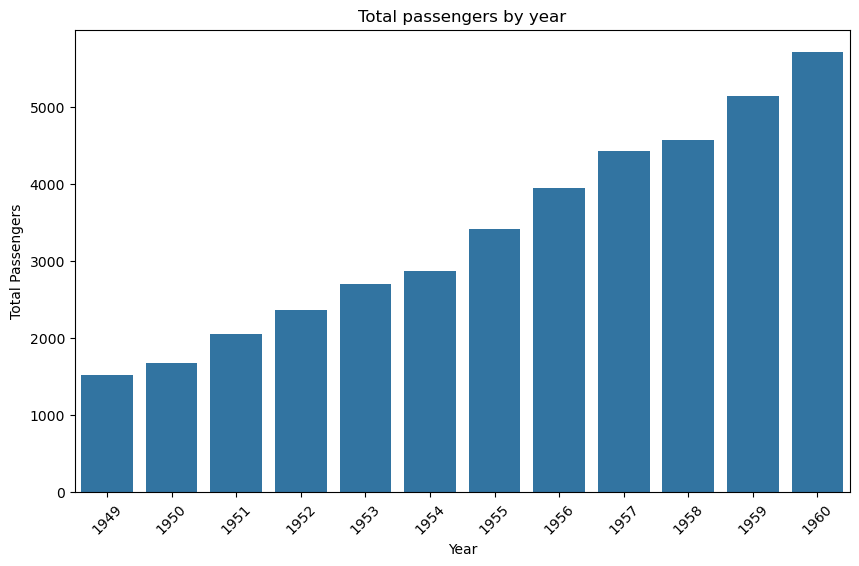

In [27]:
#Visualize the aggregation data
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='passengers', data=yearly_passengers)
plt.title('Total passengers by year')
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.xticks(rotation=45)
plt.show()
